# Lecture 1:  pipeline()
This course will teach you about natural language processing (NLP) using libraries from the Hugging Face ecosystem — 🤗 Transformers, 🤗 Datasets, 🤗 Tokenizers, and 🤗 Accelerate — as well as the Hugging Face Hub

# 1 fill-mask                                                            
# 2 ner (named entity recognition)                                                                   
# 3 question-answering                                                              
# 4 sentiment-analysis                                                    
# 5 summarization                                                          
# 6 text-generation                                                               
# 7 translation                                                                      
# 8 zero-shot-classification                                                           

# Sentiment analysis

In [4]:
from transformers import pipeline
clf = pipeline('sentiment-analysis')
# clf("I appreciate your like and comments")
# clf("I don't like when my students don't like my videos")
clf("sky is blue")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9992502331733704}]

# Pipeline
In the context of transformers and natural language processing (NLP), a "pipeline" refers to a sequence of processing steps that are applied to text data to perform various NLP tasks. Each step in the pipeline represents a specific processing task, and the output of one step becomes the input for the next step. Pipelines are used in transformers to streamline and automate the process of text analysis and NLP tasks. Here's a brief explanation of why pipelines are used and what they typically consist of:

# Note:
By default, this pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

There are three main steps involved when you pass some text to a pipeline:

The text is preprocessed into a format the model can understand.
The preprocessed inputs are passed to the model.
The predictions of the model are post-processed, so you can make sense of them.

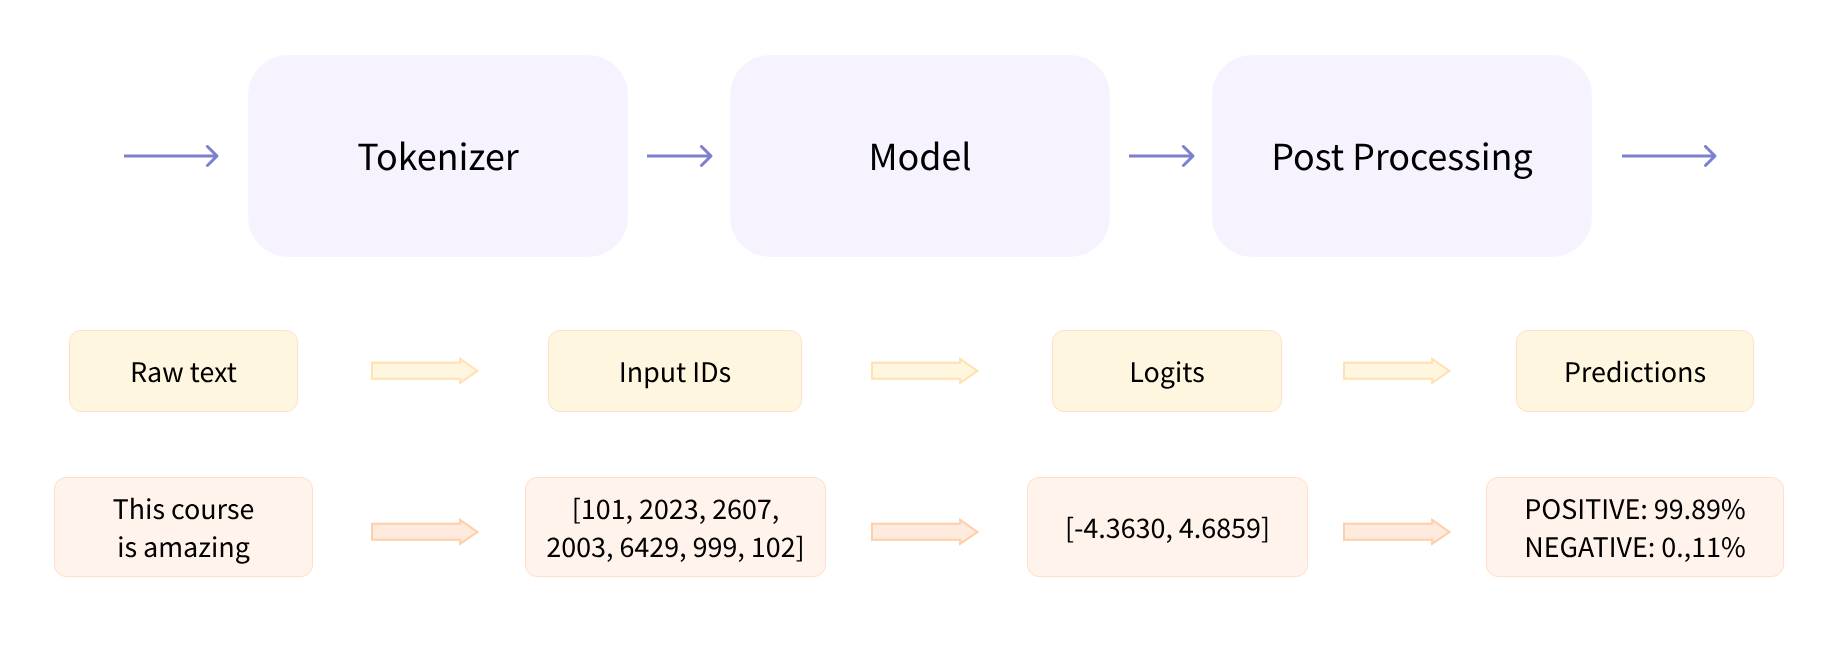

# Why We Use Pipelines in Transformers:

Simplicity: Pipelines simplify the process of applying various NLP tasks to text data. Instead of manually configuring and running each task separately, you can define a single pipeline with all the required steps.

Efficiency: Pipelines are efficient because they allow you to reuse pre-trained transformer models and avoid redundant computations. The same transformer model can be used for multiple tasks in a pipeline.

Consistency: Pipelines ensure that each task is executed consistently with the same pre-processing and post-processing steps, reducing the chance of errors and inconsistencies in results.

Ease of Deployment: When deploying NLP models for real-world applications, pipelines make it easier to manage and maintain the entire processing flow, from input data to output results.

# Zero-shot-classification

In [5]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445995450019836, 0.11197379976511002, 0.04342666268348694]}

# text-generation
Text generation
Now let’s see how to use a pipeline to generate some text. The main idea here is that you provide a prompt and the model will auto-complete it by generating the remaining text. This is similar to the predictive text feature that is found on many phones. Text generation involves randomness, so it’s normal if you don’t get the same results as shown below.

In [6]:
from transformers import pipeline
gen = pipeline('text-generation')
gen("In this course we will teach you")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'In this course we will teach you how to create a programmatically based "scripting database." In this course we will help you configure a script for the web development domain, use Java as the language and start writing an application in PowerShell using PowerShell.'}]

# Using any model from the Hub in a pipeline
The previous examples used the default model for the task at hand, but you can also choose a particular model from the Hub to use in a pipeline for a specific task — say, text generation. Go to the Model Hub and click on the corresponding tag on the left to display only the supported models for that task. You should get to a page like this one.

In [7]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
"in this course we will teach you",
max_length =30,
num_return_sequences=2
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'in this course we will teach you how your training can help you grow a better brain and also what you can learn to achieve better brain function.'},
 {'generated_text': "in this course we will teach you how to do the same thing.”\nNow if you want to try describin' your language, follow"}]

# Mask filling
The next pipeline you’ll try is fill-mask. The idea of this task is to fill in the blanks in a given text:

In [9]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=5)

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.1961982101202011,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527306497097015,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'},
 {'score': 0.03301789239048958,
  'token': 27930,
  'token_str': ' predictive',
  'sequence': 'This course will teach you all about predictive models.'},
 {'score': 0.031941480934619904,
  'token': 745,
  'token_str': ' building',
  'sequence': 'This course will teach you all about building models.'},
 {'score': 0.024522870779037476,
  'token': 3034,
  'token_str': ' computer',
  'sequence': 'This course will teach you all about computer models.'}]

# Named entity recognition
Named entity recognition (NER) is a task where the model has to find which parts of the input text correspond to entities such as persons, locations, or organizations. Let’s look at an example:

In [10]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/opt/conda/lib/python3.10/site-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9981694,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.9796019,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9932106,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

# Question answering
The question-answering pipeline answers questions using information from a given context:

In [13]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Asman ka rang kia he?",
    context="Asman ka rang nila he. Asan bahut uncha he ju humy nila dikhai deta he"
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.24102431535720825, 'start': 14, 'end': 18, 'answer': 'nila'}

# Summarization
Summarization is the task of reducing a text into a shorter text while keeping all (or most) of the important aspects referenced in the text. Here’s an example:

In [14]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

# Translation
For translation, you can use a default model if you provide a language pair in the task name (such as "translation_en_to_fr"), but the easiest way is to pick the model you want to use on the Model Hub. Here we’ll try translating from French to English:

In [15]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

/opt/conda/lib/python3.10/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]